![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



**Import data**

In [0]:
 link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here

data = pd.read_csv(link, encoding = 'unicode_escape')

In [7]:
# Print out First 5 rows from dataframe
# Your code here
data.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
# Print out brief info
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [17]:
# Your code here
data.isnull().values.any()

print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Examine few examples of NaN values**

In [20]:
# List all NaN values
data1 = data[data.isna().any(axis=1)]
print(data1.head(5))

     InvoiceNo StockCode  ... CustomerID         Country
622     536414     22139  ...        NaN  United Kingdom
1443    536544     21773  ...        NaN  United Kingdom
1444    536544     21774  ...        NaN  United Kingdom
1445    536544     21786  ...        NaN  United Kingdom
1446    536544     21787  ...        NaN  United Kingdom

[5 rows x 8 columns]


**Exclude negative Quatity entries**

In [30]:
data = data[(data.Quantity >0)]
data
any(data.Quantity < 0)

False

**Exclude negative Price entries**

In [31]:
data = data[(data.UnitPrice >0)]
data
any(data.UnitPrice < 0)

False

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [39]:
# Your code here
highest_no_of_orders = data[(data.Country == "United Kingdom")]
highest_no_of_orders[(highest_no_of_orders.Quantity == highest_no_of_orders.Quantity.max())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom


**The customer with the highest money spent on purchases comes from Netherlands**

In [44]:
# Your code here
data['Spent'] = data.Quantity * data.UnitPrice 
highest_spent = data[(data.Country == "Netherlands")]
highest_spent[(highest_spent.Spent == highest_spent.Spent.max())]



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/11 12:11,2.08,14646.0,Netherlands,4992.0


**On which year had the highest sales?**

In [56]:
# Your code here
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data.groupby("year")["Spent"].sum()


year
2010    8.237461e+05
2011    9.842938e+06
Name: Spent, dtype: float64

**How many orders (per hour)?**

In [0]:
data['hour'] = pd.DatetimeIndex(data['InvoiceDate']).hour
data.groupby("hour")["Quantity"].mean()

hour
6      1.000000
7     40.554090
8     18.079205
9     15.373372
10    17.017377
11    12.018062
12    10.885931
13     9.947536
14     9.087766
15     8.243895
16     6.211227
17     7.001234
18     8.636399
19     9.417923
20    11.953865
Name: Quantity, dtype: float64

**Make a plot about number of orders per hour**

Text(0, 0.5, 'number of orders per hour')

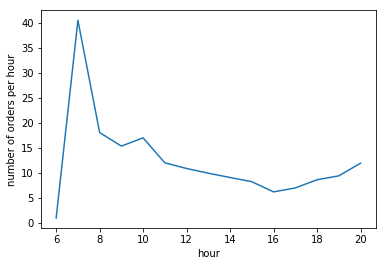

In [66]:
plt.plot(data.groupby("hour")["Quantity"].mean())
plt.xlabel ('hour')
plt.ylabel ('number of orders per hour')

**How many orders (per month)?**

In [64]:
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data.groupby("month")["Quantity"].mean()

month
1     11.303708
2     10.461354
3     10.544535
4     10.613658
5     10.942871
6     10.818384
7     10.396144
8     12.231244
9     11.587666
10    10.511955
11     9.050211
12    10.113784
Name: Quantity, dtype: float64

**Make a plot about number of orders per month**

Text(0, 0.5, 'number of orders per month')

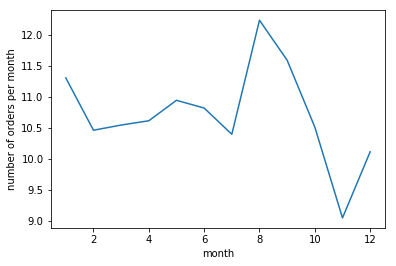

In [68]:
plt.plot(data.groupby("month")["Quantity"].mean())
plt.xlabel ('month')
plt.ylabel ('number of orders per month')

**Top 10 items most sales**

In [77]:
data.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Text(0, 0.5, 'Quantity')

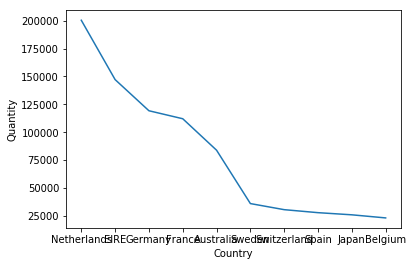

In [82]:
# Your code here
data = data[(data.Country != "United Kingdom")]
data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10)

plt.plot(data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10))
plt.xlabel ('Country')
plt.ylabel ('Quantity')

# What can you tell about this?

#Most of orders come from countries from Europe

In [83]:
data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10)

Country
Netherlands    200361
EIRE           147173
Germany        119261
France         112103
Australia       83901
Sweden          36083
Switzerland     30629
Spain           27940
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64

### You are awesome!!